In [1]:
!rm -r /content/FER_Custom_Dataset

rm: cannot remove '/content/FER_Custom_Dataset': No such file or directory


In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
import shutil
shutil.copy("/content/drive/MyDrive/AI_Datasets/FER_Custom_Dataset.zip", "/content")

In [ ]:
%cd /content/

In [ ]:
import os

In [ ]:
import zipfile
for file in os.listdir():
    if file.endswith(".zip"):
        with zipfile.ZipFile(file, "r") as zip_file:
            zip_file.extractall()
        os.remove(file)

In [2]:
!pip install seaborn
!pip install pillow==6.2.1
!pip install scikit-learn

  Using cached seaborn-0.12.1-py3-none-any.whl (288 kB)
  Using cached Pillow-6.2.1-cp39-cp39-linux_x86_64.whl
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.0.1
    Uninstalling Pillow-9.0.1:
      Successfully uninstalled Pillow-9.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 1.0.61 requires nvidia-ml-py3, which is not installed.
bokeh 2.4.2 requires pillow>=7.1.0, but you have pillow 6.2.1 which is incompatible.
  Using cached scikit_learn-1.1.3-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (30.8 MB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)


In [1]:
import os
import torch
import torchvision
import tarfile
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torch.utils.data import random_split
from torchvision.utils import make_grid
import matplotlib
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from torch.utils.data.sampler import SubsetRandomSampler
import glob
import torch.optim as optim
import time
import cv2
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.utils.data as td
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from matplotlib import image
from matplotlib import pyplot
import time
import torchvision.datasets as datasets
from tqdm import tqdm
from torch.utils.tensorboard import SummaryWriter
from sklearn.metrics import confusion_matrix
import math
import seaborn as sn
import pandas as pd
from torchvision.models import vgg19
%matplotlib inline

In [2]:
data_dir = '/home/jovyan/workspace/FER_Custom_Dataset'
IMAGE_DIM=256
print(os.listdir(data_dir))

['Disappointed', 'neutral', 'interested']


In [77]:
def load_data(path, test_split, val_split, batch_size, input_size):
    
    ######## Write your code here ########
    
    transform_dict = {
                    'src': transforms.Compose([
                      
                      transforms.Resize(input_size),
                      # transforms.CenterCrop(227), 
                      transforms.RandomHorizontalFlip(), 
                      transforms.ToTensor(),
                      transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                            std=[0.229, 0.224, 0.225]),
     ])}

    data = datasets.ImageFolder(root=path, transform=transform_dict['src'])

    dataset_size = len(data)
    
    train_size = int((1-(test_split+val_split))*dataset_size)+1
    test_size = int(test_split * dataset_size)
    val_size = int(val_split * dataset_size)

    train_dataset, test_dataset, val_dataset= td.random_split(data, [train_size, test_size, val_size])

    data_loader_train = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=False, num_workers=0)
    data_loader_test  = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True, drop_last=False, num_workers=0)
    data_loader_val  = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=True, drop_last=False, num_workers=0)
    
    return data_loader_train, data_loader_test, data_loader_val

(64, 64, 3)
(64, 64, 3)
(64, 64, 3)


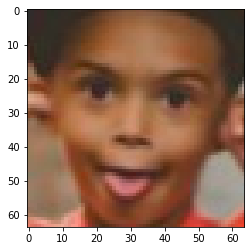

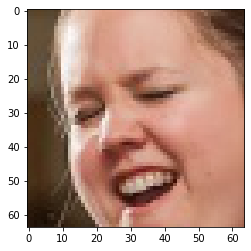

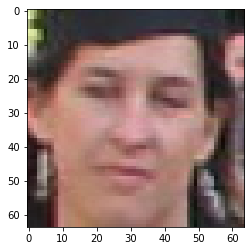

In [78]:
path = "/home/jovyan/workspace/FER_Custom_Dataset"

######## Write your code here ########
InterestedImage = image.imread(path+"/interested/253.jpg")
plt.figure()
plt.imshow(InterestedImage)
DisaapointedImage = image.imread(path+"/Disappointed/1000.jpg")
plt.figure()
plt.imshow(DisaapointedImage)
NeutralImage = image.imread(path+"/neutral/24634.jpg")
plt.figure()
plt.imshow(NeutralImage)
print(NeutralImage.shape)
print(DisaapointedImage.shape)
print(NeutralImage.shape)

In [79]:
train_loader, test_loader, val_loader = load_data(path, 0.2, 0.1, 32, (128, 128))
print(len(train_loader), len(test_loader), len(val_loader))

91 26 13


In [80]:
def plot_data_loader(data_loader, gridDims):
    
    fig, axes = plt.subplots(nrows=gridDims[0], ncols=gridDims[1], figsize=(5,5))
    dataiter = iter(data_loader)
    for i in range(gridDims[0]):
        for j in range(gridDims[1]):
            images, _ = dataiter.next()
            axes[i, j].imshow(np.transpose(images[0].numpy(), (1, 2, 0)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


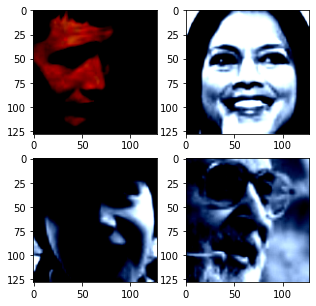

In [81]:
plot_data_loader(train_loader, (2, 2))

In [69]:
model = vgg19(pretrained=False)
n_classes = 3

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device: {}".format(device))
model.to(device)



Device: cuda:0


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [9]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device: {}".format(device))
model.to(device);

Device: cuda:0


In [11]:
for i, data in enumerate(train_loader):
        images, labels = data[0].to(device), data[1].to(device)
        print(images.shape)
        #print(labels)
        if i == 5:
          break

torch.Size([32, 3, 128, 128])
torch.Size([32, 3, 128, 128])
torch.Size([32, 3, 128, 128])
torch.Size([32, 3, 128, 128])
torch.Size([32, 3, 128, 128])
torch.Size([32, 3, 128, 128])


In [82]:
def evaluate(model, val_loader):
      model.eval() 
      with torch.no_grad(): 
        correct = 0
        total = 0
        for data in val_loader:
          images, labels = data[0].to(device), data[1].to(device)
          labels=torch.flatten(labels)
          outputs = model(images)
          loss = criterion(outputs, labels)
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
      accuracy = (correct / total) * 100
      model.train()
      return accuracy, loss.item()

In [117]:
def train(num_epochs, model, train_loader, val_loader, criterion, optimizer):
    total_steps = len(train_loader)
    t1 = time.time()

    training_loss = []
    training_accuracy = []
    validation_loss = []
    validation_accuracy = []

    loss = None
    clip_value = 5
    for epoch in range(num_epochs):
        for i, data in enumerate(train_loader):
            images, labels = data[0].to(device), data[1].to(device)
            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            # Backprop and optimisation
            optimizer.zero_grad()
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), clip_value, error_if_nonfinite=False)
            optimizer.step()
            # Train accuracy
            total = labels.size(0)
            _,predicted = torch.max(outputs.data, 1)
            correct = (predicted == labels).sum().item()
            if (i + 1) % 91 == 0:
                val_accu, val_loss = evaluate(model, val_loader)
                print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}, val_loss: {:.4f}, val_accuracy: {:.2f}%'.format(epoch + 1, num_epochs, i + 1, total_steps, loss.item(),(correct / total) * 100, val_loss, val_accu))
                training_loss.append(loss.item())
                training_accuracy.append((correct / total) * 100)
                validation_accuracy.append(val_accu)
                validation_loss.append(val_loss)
                
    print("######## Training Finished in {} seconds ###########".format(time.time()-t1))
    return training_loss, training_accuracy, model

In [127]:
def confusion_matrix_for_specific_LR(lr, model, test_loader):
    y_pred = []
    y_true = []
    for i, data in enumerate(test_loader):
        
        inputs, labels = data[0].to(device), data[1].to(device)
        output = model(inputs) # Feed Network
        
        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) # Save Prediction
        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth

    # constant for classes
    classes = ('neutral', 'interested', 'Disappointed')

    # Build confusion matrix
    cf_matrix = confusion_matrix(y_true, y_pred)

    import seaborn as sns
    
    # sns.heatmap(cf_matrix, annot=True)
    df_cm = pd.DataFrame(cf_matrix, index = [i for i in classes],
                         columns = [i for i in classes])
    plt.figure(figsize = (12,7))
    sn.heatmap(df_cm, annot=True)
    plt.title(f'Confusion matrix for lr {lr}')
    plt.savefig(f'Confusion_matrix_Vgg19_Fer_lr_{lr}.png')
    print(classification_report(y_true, y_pred, target_names=['neutral', 'interested', 'Disappointed']))

Results of the learning rate = 0.1
Epoch [1/50], Step [91/91], Loss: 1.1034, Accuracy: 34.78, val_loss: 1.1069, val_accuracy: 36.96%
Epoch [2/50], Step [91/91], Loss: 1.0414, Accuracy: 43.48, val_loss: 1.2083, val_accuracy: 36.96%
Epoch [3/50], Step [91/91], Loss: 1.0911, Accuracy: 43.48, val_loss: 1.1021, val_accuracy: 36.96%
Epoch [4/50], Step [91/91], Loss: 1.0580, Accuracy: 39.13, val_loss: 1.1130, val_accuracy: 36.71%
Epoch [5/50], Step [91/91], Loss: 1.0758, Accuracy: 30.43, val_loss: 1.1004, val_accuracy: 36.96%
Epoch [6/50], Step [91/91], Loss: 1.0722, Accuracy: 47.83, val_loss: 1.0920, val_accuracy: 36.96%
Epoch [7/50], Step [91/91], Loss: 1.1150, Accuracy: 39.13, val_loss: 1.1604, val_accuracy: 36.96%
Epoch [8/50], Step [91/91], Loss: 1.1685, Accuracy: 26.09, val_loss: 1.0660, val_accuracy: 26.33%
Epoch [9/50], Step [91/91], Loss: 1.0457, Accuracy: 56.52, val_loss: 1.2144, val_accuracy: 36.96%
Epoch [10/50], Step [91/91], Loss: 1.1032, Accuracy: 43.48, val_loss: 1.1897, val_a

/srv/conda/envs/saturn/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/srv/conda/envs/saturn/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/srv/conda/envs/saturn/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     neutral       0.37      0.93      0.53       308
  interested       0.00      0.00      0.00       250
Disappointed       0.35      0.08      0.13       271

    accuracy                           0.37       829
   macro avg       0.24      0.34      0.22       829
weighted avg       0.25      0.37      0.24       829

Testing Accuracy for learning rate 0.1 = 37.15319662243667
Results of the learning rate = 0.01
Epoch [1/50], Step [91/91], Loss: 1.1989, Accuracy: 34.78, val_loss: 1.1430, val_accuracy: 39.37%
Epoch [2/50], Step [91/91], Loss: 0.9724, Accuracy: 47.83, val_loss: 1.1836, val_accuracy: 35.75%
Epoch [3/50], Step [91/91], Loss: 1.3417, Accuracy: 30.43, val_loss: 1.0935, val_accuracy: 41.55%
Epoch [4/50], Step [91/91], Loss: 1.0641, Accuracy: 43.48, val_loss: 1.0571, val_accuracy: 52.17%
Epoch [5/50], Step [91/91], Loss: 1.0985, Accuracy: 43.48, val_loss: 1.0980, val_accuracy: 53.14%
Epoch [6/50], Step [91/91], Loss: 

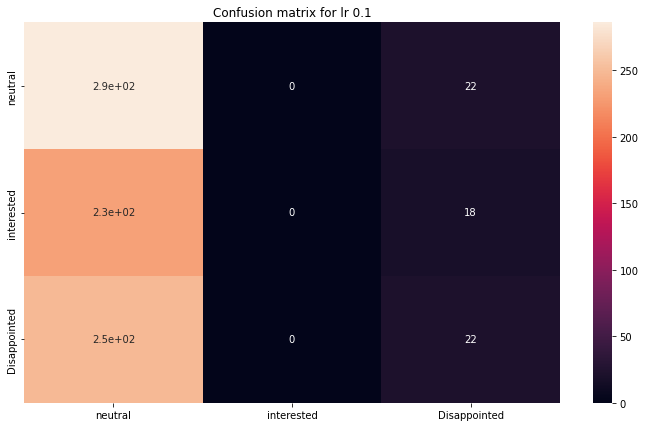

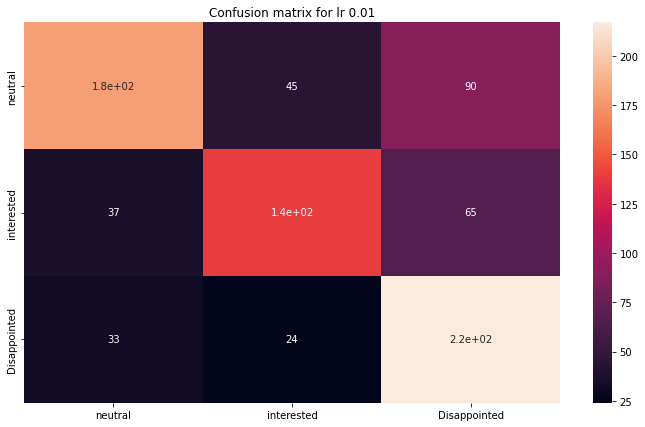

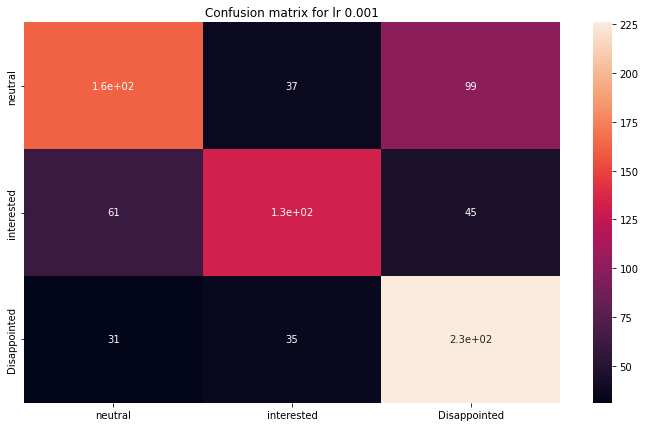

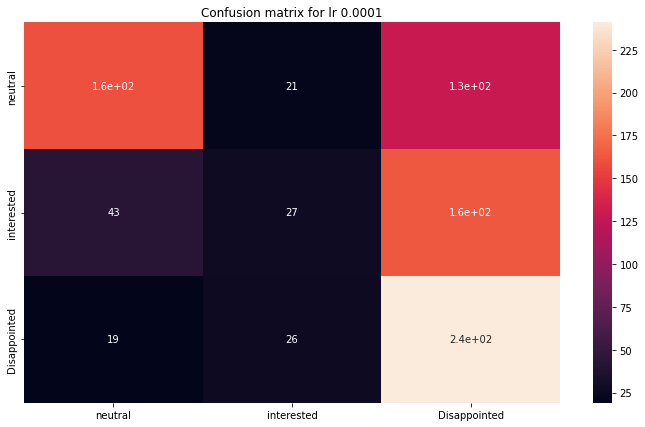

In [135]:
############ Define the dictionaries and set the values for number of epochs and batch size ############
hyper_parameters = {'learning_rate': [0.1, 0.01, 0.001, 0.0001]}
train_loss_hyper_paramaters = {'lr0.1':0, 'lr0.01':0, 'lr0.001': 0, 'lr0.0001' : 0}
train_acc_hyper_paramaters = {'lr0.1':0, 'lr0.01':0, 'lr0.001': 0, 'lr0.0001' : 0}

for learning_rate in hyper_parameters["learning_rate"]:
    print(f'Results of the learning rate = {learning_rate}')
    model = vgg19(pretrained = False)
    criterion = nn.CrossEntropyLoss()
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model.to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
    train_loader, test_loader , val_loader= load_data(path, 0.2, 0.1, 32, (128, 128))
    
    ############ Call the train function ###########
    num_epochs = 50
    training_loss, training_accuracy, model = train(num_epochs, model, train_loader, val_loader,criterion, optimizer)
    confusion_matrix_for_specific_LR(learning_rate, model, test_loader)
    
    test_acc = test(model, test_loader)
    print(f"Testing Accuracy for learning rate {learning_rate} = {test_acc}")

    ############ Store train_loss, and train_accuracy in the defined dictionaries ###########
    train_loss_hyper_paramaters[f'lr{learning_rate}'] = training_loss
    train_acc_hyper_paramaters[f'lr{learning_rate}'] = training_accuracy

In [137]:
def test(model, test_loader):
    model.eval() 
    with torch.no_grad(): 
      correct = 0
      total = 0
      for data in test_loader:
        images, labels = data[0].to(device), data[1].to(device)
        labels=torch.flatten(labels)
        outputs = model(images)
        loss = criterion(outputs, labels)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    return (correct / total) * 100

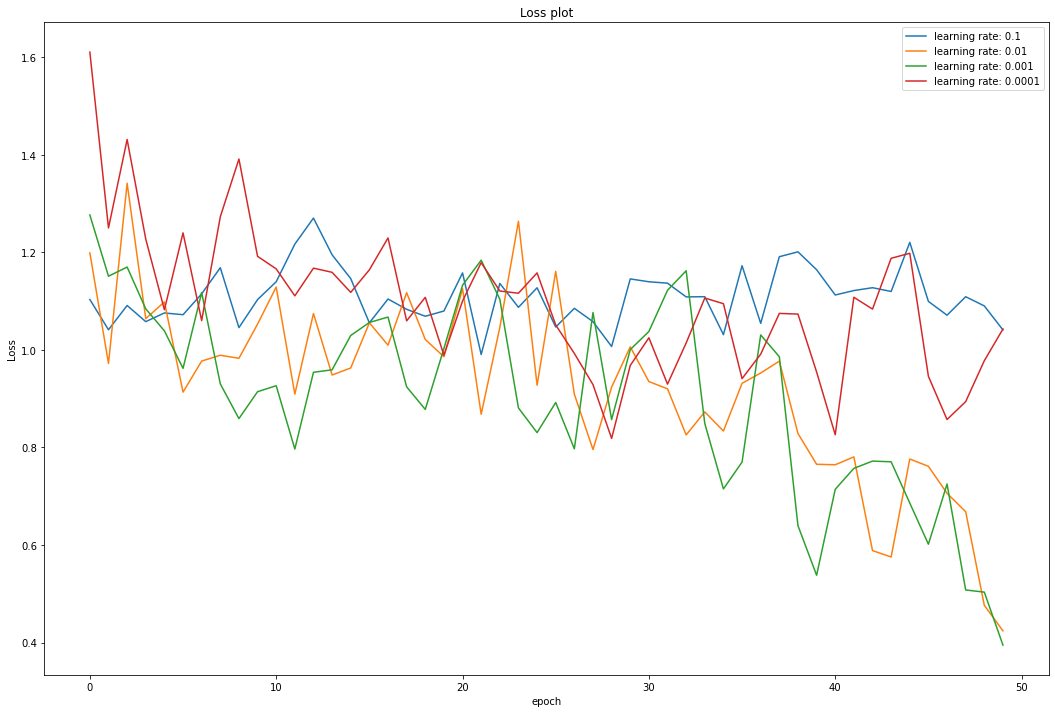

In [138]:
####### plotting train loss versus epoch for each learning rate in one plot #########

epochs = [i for i in range(num_epochs)]
plt.figure(figsize=(18,12))
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.title('Loss plot')

for learning_rate in hyper_parameters["learning_rate"]:
    plt.plot(epochs,train_loss_hyper_paramaters[f'lr{learning_rate}'],label=f'learning rate: {learning_rate}')
    
plt.legend()
plt.savefig('Loss_Vgg19_Fer.png')

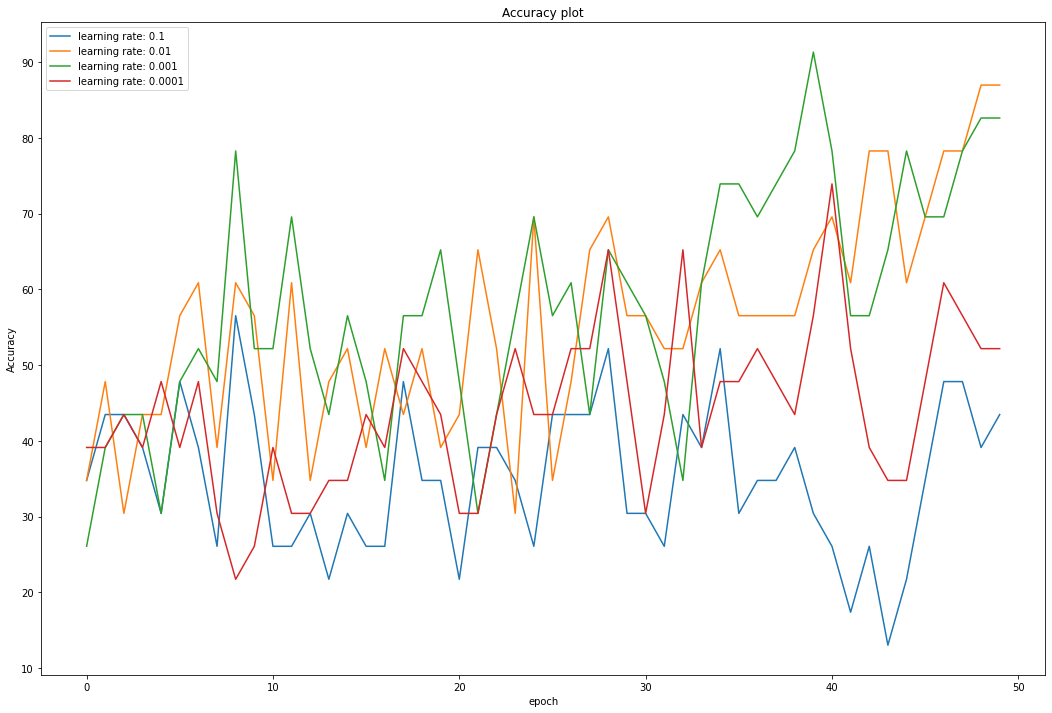

In [139]:
####### plotting train accuracy versus epoch for each learning rate in one plot #########

epochs = [i for i in range(num_epochs)]
plt.figure(figsize=(18,12))
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy plot')

for learning_rate in hyper_parameters["learning_rate"]:
    plt.plot(epochs,train_acc_hyper_paramaters[f'lr{learning_rate}'],label=f'learning rate: {learning_rate}')
    
plt.legend()
plt.savefig('Accuracy_Vgg19_Fer.png')

In [140]:
PATH = "/home/jovyan/workspace/vgg19_fer.pt"
torch.save(model.state_dict(), PATH)